In [1]:
import pandas as pd

In [26]:
filename = '../datasets/KNMI_20191231.txt'
df = pd.read_csv(filename, comment='#', names=['STN','YYYYMMDD','TG','TN','TX'])

In [27]:
df

,STN,YYYYMMDD,TG,TN,TX
0,260,20190101,77,55,94
1,260,20190102,54,41,69
2,260,20190103,40,24,66
3,260,20190104,51,19,65
4,260,20190105,70,57,80
...,...,...,...,...,...
725,279,20191227,19,-12,51
726,279,20191228,-7,-24,8
727,279,20191229,8,-21,32
728,279,20191230,40,2,64


### Stap 4: Converteer naar graden

In [28]:
df['TG'] = df['TG'] / 10
df['TN'] = df['TN'] / 10
df['TX'] = df['TX'] / 10

df

,STN,YYYYMMDD,TG,TN,TX
0,260,20190101,7.7,5.5,9.4
1,260,20190102,5.4,4.1,6.9
2,260,20190103,4.0,2.4,6.6
3,260,20190104,5.1,1.9,6.5
4,260,20190105,7.0,5.7,8.0
...,...,...,...,...,...
725,279,20191227,1.9,-1.2,5.1
726,279,20191228,-0.7,-2.4,0.8
727,279,20191229,0.8,-2.1,3.2
728,279,20191230,4.0,0.2,6.4


### Stap 5: Converteer datum

In [29]:
df['DATUM'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

df

,STN,YYYYMMDD,TG,TN,TX,DATUM
0,260,20190101,7.7,5.5,9.4,2019-01-01
1,260,20190102,5.4,4.1,6.9,2019-01-02
2,260,20190103,4.0,2.4,6.6,2019-01-03
3,260,20190104,5.1,1.9,6.5,2019-01-04
4,260,20190105,7.0,5.7,8.0,2019-01-05
...,...,...,...,...,...,...
725,279,20191227,1.9,-1.2,5.1,2019-12-27
726,279,20191228,-0.7,-2.4,0.8,2019-12-28
727,279,20191229,0.8,-2.1,3.2,2019-12-29
728,279,20191230,4.0,0.2,6.4,2019-12-30


### Stap ...: Converteer stationnamen

In [35]:
df['STATION'] = df['STN'].map({260:'De Bilt', 279:'Hoogeveen'})
df

,STN,YYYYMMDD,TG,TN,TX,DATUM,STATION
0,260,20190101,7.7,5.5,9.4,2019-01-01,De Bilt
1,260,20190102,5.4,4.1,6.9,2019-01-02,De Bilt
2,260,20190103,4.0,2.4,6.6,2019-01-03,De Bilt
3,260,20190104,5.1,1.9,6.5,2019-01-04,De Bilt
4,260,20190105,7.0,5.7,8.0,2019-01-05,De Bilt
...,...,...,...,...,...,...,...
725,279,20191227,1.9,-1.2,5.1,2019-12-27,Hoogeveen
726,279,20191228,-0.7,-2.4,0.8,2019-12-28,Hoogeveen
727,279,20191229,0.8,-2.1,3.2,2019-12-29,Hoogeveen
728,279,20191230,4.0,0.2,6.4,2019-12-30,Hoogeveen


### Stap 6: Unstack dataframe

In [55]:
df_unstacked = df.set_index(['DATUM','STATION'])[['TG','TN','TX']].unstack()
df_unstacked

TG                TN                TX          
STATION    De Bilt Hoogeveen De Bilt Hoogeveen De Bilt Hoogeveen
DATUM                                                           
2019-01-01     7.7       6.9     5.5       4.6     9.4       8.4
2019-01-02     5.4       4.4     4.1       1.0     6.9       6.8
2019-01-03     4.0       2.5     2.4       0.2     6.6       5.9
2019-01-04     5.1       4.6     1.9       1.5     6.5       6.6
2019-01-05     7.0       7.3     5.7       6.6     8.0       8.2
...            ...       ...     ...       ...     ...       ...
2019-12-27     3.3       1.9    -1.5      -1.2     6.3       5.1
2019-12-28    -0.1      -0.7    -3.4      -2.4     3.0       0.8
2019-12-29     1.2       0.8    -1.5      -2.1     3.4       3.2
2019-12-30     4.6       4.0     1.7       0.2     7.9       6.4
2019-12-31     4.2       3.6     0.6      -1.5     8.8       8.0

[365 rows x 6 columns]

In [54]:
df.pivot(index='DATUM', columns='STATION', values=['TG','TN','TX'])

TG                TN                TX          
STATION    De Bilt Hoogeveen De Bilt Hoogeveen De Bilt Hoogeveen
DATUM                                                           
2019-01-01     7.7       6.9     5.5       4.6     9.4       8.4
2019-01-02     5.4       4.4     4.1       1.0     6.9       6.8
2019-01-03     4.0       2.5     2.4       0.2     6.6       5.9
2019-01-04     5.1       4.6     1.9       1.5     6.5       6.6
2019-01-05     7.0       7.3     5.7       6.6     8.0       8.2
...            ...       ...     ...       ...     ...       ...
2019-12-27     3.3       1.9    -1.5      -1.2     6.3       5.1
2019-12-28    -0.1      -0.7    -3.4      -2.4     3.0       0.8
2019-12-29     1.2       0.8    -1.5      -2.1     3.4       3.2
2019-12-30     4.6       4.0     1.7       0.2     7.9       6.4
2019-12-31     4.2       3.6     0.6      -1.5     8.8       8.0

[365 rows x 6 columns]

### Stap 7: Plot temperaturen

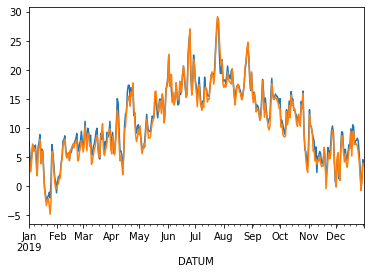

In [56]:
df_unstacked[('TG','De Bilt')].plot()
df_unstacked[('TG','Hoogeveen')].plot()

In [57]:
df_unstacked['diff'] = df_unstacked[('TG', 'De Bilt')] - df_unstacked[('TG','Hoogeveen')]
df_unstacked

TG                TN                TX           diff
STATION    De Bilt Hoogeveen De Bilt Hoogeveen De Bilt Hoogeveen     
DATUM                                                                
2019-01-01     7.7       6.9     5.5       4.6     9.4       8.4  0.8
2019-01-02     5.4       4.4     4.1       1.0     6.9       6.8  1.0
2019-01-03     4.0       2.5     2.4       0.2     6.6       5.9  1.5
2019-01-04     5.1       4.6     1.9       1.5     6.5       6.6  0.5
2019-01-05     7.0       7.3     5.7       6.6     8.0       8.2 -0.3
...            ...       ...     ...       ...     ...       ...  ...
2019-12-27     3.3       1.9    -1.5      -1.2     6.3       5.1  1.4
2019-12-28    -0.1      -0.7    -3.4      -2.4     3.0       0.8  0.6
2019-12-29     1.2       0.8    -1.5      -2.1     3.4       3.2  0.4
2019-12-30     4.6       4.0     1.7       0.2     7.9       6.4  0.6
2019-12-31     4.2       3.6     0.6      -1.5     8.8       8.0  0.6

[365 rows x 7 columns]

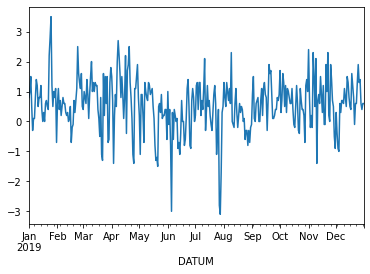

In [58]:
df_unstacked['diff'].plot()

In [59]:
df_unstacked['diff'].mean()

0.5542465753424657